# Fundamentals of Machine Learning - Exercise 6
* The goal of this excercise is to complete the hands-on experience task with similar task description as the project has.

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_06_meme_01.png?raw=true)

In [6]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data description

Data source: https://www.kaggle.com/datasets/subhajitnayak/country-data?resource=download&select=Country-data.csv

|Attribute|Description|
|:-------|:-------|
|country | Name of the country |
|child_mort | Death of children under 5 years of age per 1000 live births |
|exports | Exports of goods and services. Given as %age of the Total GDP |
|health | Total health spending as %age of Total GDP |
|imports | Imports of goods and services. Given as %age of the Total GDP |
|Income | Net income per person |
|Inflation | The measurement of the annual growth rate of the Total GDP |
|life_expec | The average number of years a new born child would live if the current mortality patterns are to rem... |
|total_fer | The number of children that would be born to each woman if the current age-fertility rates remain th... |
|gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population. |

## Load the data

In [7]:
df = pd.read_csv('https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/raw/master/datasets/country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Check the numerical features first

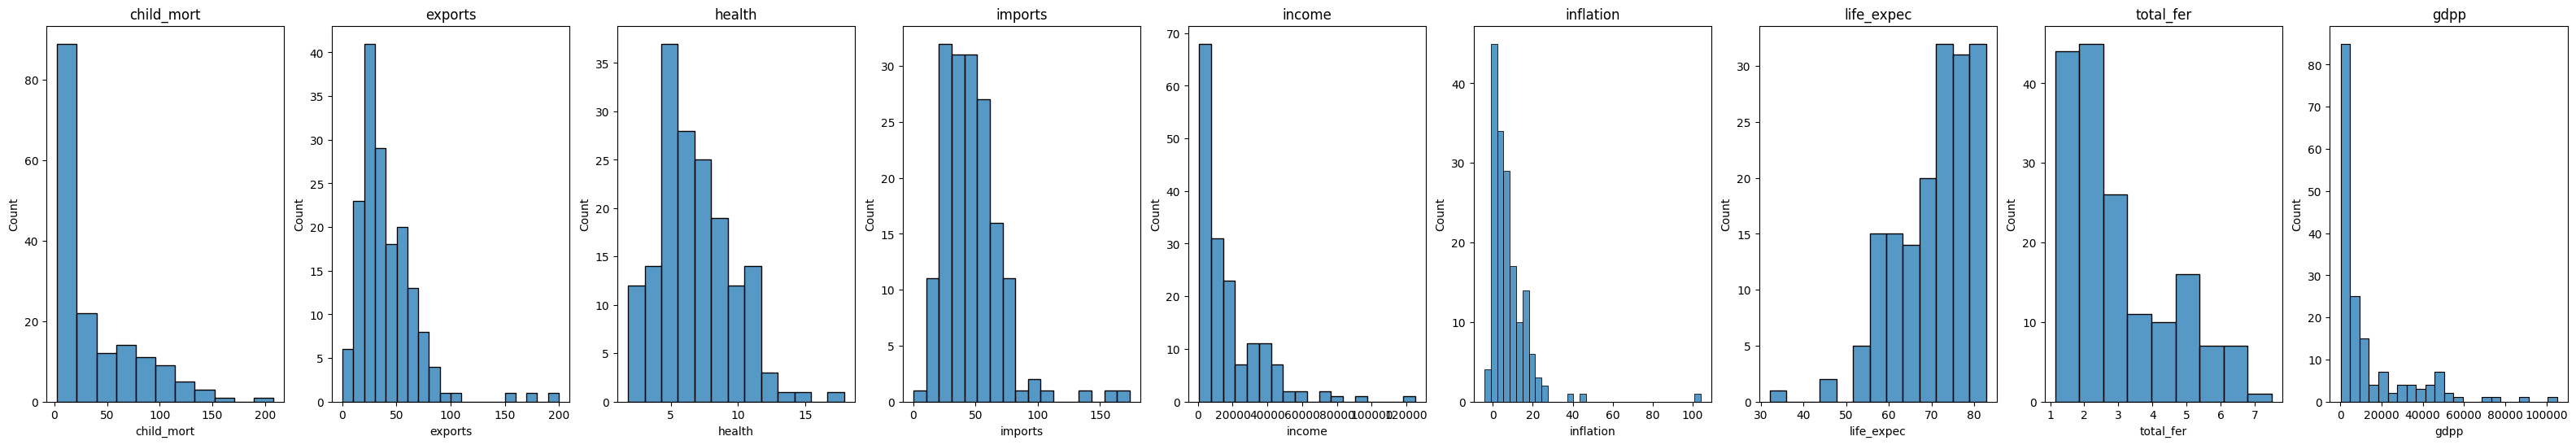

In [9]:
df_only_numeric = df.select_dtypes(np.number)

n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

# 🔎 Is it wise to scale the data?
* 🔎 Why do we want to preprocess the data?
* What different options do we have?

# Data preprocessing

In [10]:
X = df_only_numeric.values

In [11]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(X)
X_min_max_scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [12]:
df.select_dtypes(np.number).columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [13]:
df_scaled = pd.DataFrame(X_min_max_scaled, columns=df_only_numeric.columns)

In [14]:
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


# ✅ Task (2p)
## Use k-means or agglomerative clustering algorithm to cluster the data
- 🔎 How many clusters did you choose? Why?

## Perform an exploration analysis of the clustered data
- 💡Write down your conlusions about differences/similarities about the feature characteristics according to the individial clusters

## 🎯 Write down a conlustion about clusters as a whole, i.e. try to characterize the data in them in a few sentences
- Cluster 1 - ...
- Cluster 2 - ...
- ...
- Cluster N - ...

* **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
  * ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

# 🚀 Let's get started!

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_06_meme_02.jpg?raw=true)

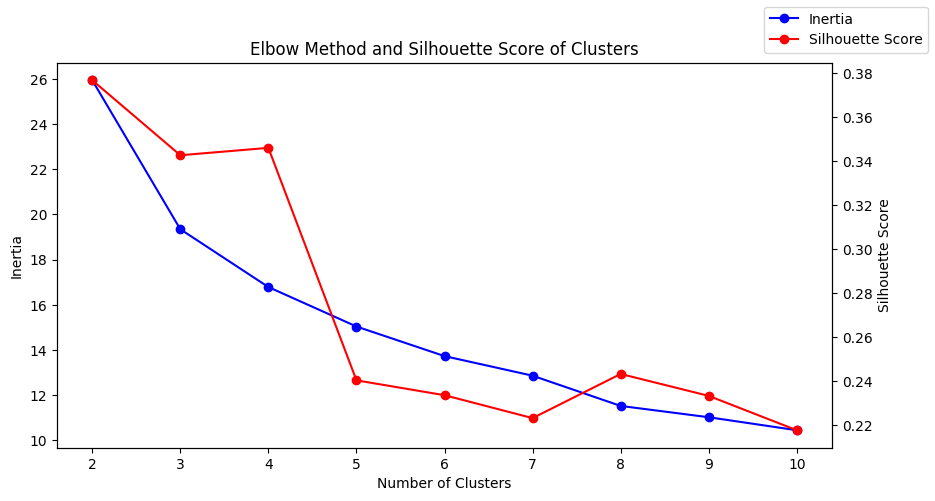

In [20]:
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_min_max_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_min_max_scaled, kmeans.labels_))

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(range_clusters, inertia, 'bo-', label='Inertia')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Inertia")
ax1.set_title("Elbow Method and Silhouette Score of Clusters")

ax2 = ax1.twinx()
ax2.plot(range_clusters, silhouette_scores, 'ro-', label='Silhouette Score')
ax2.set_ylabel("Silhouette Score")
fig.legend(loc="upper right")
plt.show()

### Ideální počet Clusterů a proč?
Zvolili jsme **3 shluky**, protože Elbow metoda ukazuje výrazný pokles inertie mezi 2 a 3 shluky. Navíc Silhouette skóre pro 3 shluky zůstává relativně vysoké, což ukazuje na dobře oddělené shluky.

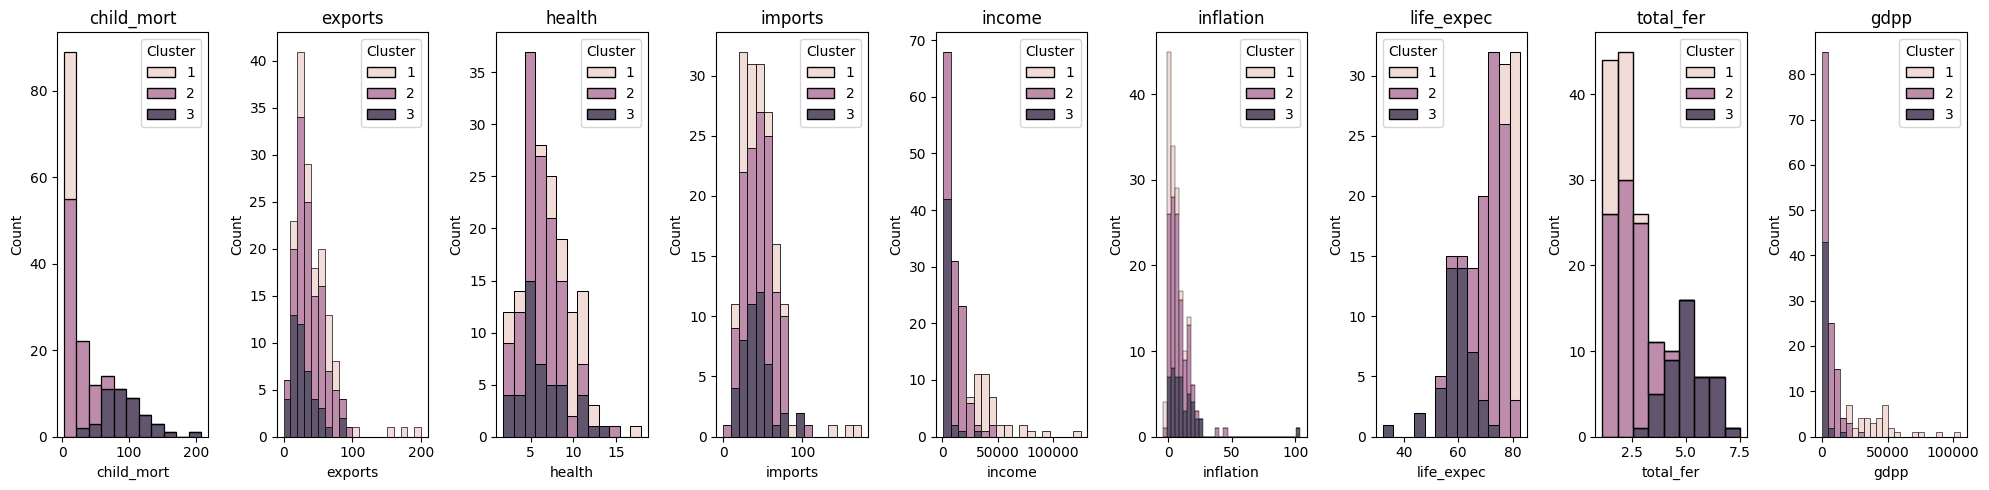

In [21]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_min_max_scaled) + 1

fig, axes = plt.subplots(1, len(df_only_numeric.columns), figsize=(20, 5))
for i, column in enumerate(df_only_numeric.columns):
    sns.histplot(data=df, x=column, hue='Cluster', multiple='stack', ax=axes[i]).set_title(column)
plt.tight_layout()
plt.show()

### Závěry o jednotlivých Clusterech
- **Cluster 1**: Nižší dětská úmrtnost, vyšší příjem – ekonomicky stabilní země.
- **Cluster 2**: Průměrný příjem, vyšší inflace – přechodová fáze rozvoje.
- **Cluster 3**: Vyšší dětská úmrtnost, nižší příjem – ekonomicky slabší země.

### Celkový závěr
Shluky rozdělují země na ekonomicky silné, přechodové a slabší.

### Poznatky z grafů
- `child_mort`: Cluster 3 má vyšší dětskou úmrtnost, Cluster 1 nejnižší.
- `income`: Cluster 1 má vyšší příjem než Clustery 2 a 3.
